In [1]:
import pandas as pd
import plotly.express as px
import plotly

### Map of number of physicians per 1000 people

In [2]:
df = pd.read_csv("../data/merged_dataset.csv", index_col=0)
df.head()

,zipcode,population,sqkm,lat,lon,population_density,physicians_count,physicians_density,physicians_per_1000_people
0,80331,4741,0.782770,48.13575,11.57351,6056.696092,174,222.287517,36.701118
1,80333,11265,1.615148,48.14495,11.56824,6974.593040,102,63.152107,9.054594
2,80335,9042,1.697719,48.14657,11.55112,5325.969728,71,41.820820,7.852245
3,80336,8103,1.568529,48.13101,11.55228,5165.986730,108,68.854321,13.328397
4,80337,15280,1.046991,48.12675,11.55904,14594.203771,51,48.711020,3.337696


In [4]:
# sort by physicians_per_1000_people in ascending order
df.sort_values(by="physicians_per_1000_people", inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()

,zipcode,population,sqkm,lat,lon,population_density,physicians_count,physicians_density,physicians_per_1000_people
0,80993,16207,2.401043,48.18670,11.52141,6749.983236,3,1.249457,0.185105
1,81671,17950,2.293257,48.12326,11.61188,7827.295414,6,2.616366,0.334262
2,81249,17519,24.899701,48.16514,11.38836,703.582746,6,0.240967,0.342485
3,81543,19962,2.943451,48.10830,11.56503,6781.835335,7,2.378161,0.350666
4,80997,22698,10.930837,48.19279,11.48446,2076.510701,8,0.731874,0.352454


In [5]:
df.to_csv("../data/merged_sorted_dataset.csv")

In [6]:
min = df.head(1)["physicians_per_1000_people"].values[0]
min

0.1851052014561609

In [7]:
max = df.tail(1)["physicians_per_1000_people"].values[0]
max

36.70111790761442

In [8]:
df["reverse_physicians_per_1000_people"] = 1 / df["physicians_per_1000_people"]
df.head()

,zipcode,population,sqkm,lat,lon,population_density,physicians_count,physicians_density,physicians_per_1000_people,reverse_physicians_per_1000_people
0,80993,16207,2.401043,48.18670,11.52141,6749.983236,3,1.249457,0.185105,5.402333
1,81671,17950,2.293257,48.12326,11.61188,7827.295414,6,2.616366,0.334262,2.991667
2,81249,17519,24.899701,48.16514,11.38836,703.582746,6,0.240967,0.342485,2.919833
3,81543,19962,2.943451,48.10830,11.56503,6781.835335,7,2.378161,0.350666,2.851714
4,80997,22698,10.930837,48.19279,11.48446,2076.510701,8,0.731874,0.352454,2.837250


In [9]:
df.tail()

,zipcode,population,sqkm,lat,lon,population_density,physicians_count,physicians_density,physicians_per_1000_people,reverse_physicians_per_1000_people
69,80335,9042,1.697719,48.14657,11.55112,5325.969728,71,41.820820,7.852245,0.127352
70,80801,9242,0.469850,48.15916,11.57902,19670.107481,76,161.753751,8.223328,0.121605
71,80333,11265,1.615148,48.14495,11.56824,6974.593040,102,63.152107,9.054594,0.110441
72,80336,8103,1.568529,48.13101,11.55228,5165.986730,108,68.854321,13.328397,0.075028
73,80331,4741,0.782770,48.13575,11.57351,6056.696092,174,222.287517,36.701118,0.027247


In [11]:
fig = px.scatter_mapbox(df,
                        lat='lat',
                        lon='lon',
                        color='reverse_physicians_per_1000_people',
                        size='reverse_physicians_per_1000_people',
                        size_max=30,
                        # hover_name='zipcode',
                        hover_data={
                                    "zipcode":':.0f',    
                                    "physicians_per_1000_people":':.2f',
                                    "population_density":':.0f',
                                   'lat':False, 'lon':False, 'reverse_physicians_per_1000_people':False}, # remove from hover template: lon, lat, reverse...
                        zoom=10,
                        title="<b>'Requirement for physicians per 1000 people across Munich'</b>",
                        color_discrete_sequence=px.colors.qualitative.Plotly,
                        labels={
                                "zipcode":"Zip Code",
                                "physicians_per_1000_people": "Physicians Density",
                                "population_density":"Population Density",
                                "reverse_physicians_per_1000_people": "Physicians Requirement Score"
                               }
                       )

fig.update_layout(
                    title={"font_size":20,
                           "xanchor":"center", "x":0.38,
                           "yanchor":"bottom", "y":0.95},
                    title_font=dict(size=24, color='Black', family='Arial, sans-serif'),
                    height=900,
                    width=1300,
                    autosize=True,
                    hovermode='closest',
                    hoverlabel={"bgcolor":"white",
                              "font_color":"black", 
                              "font_size":12,
                             "font_family":"Sans"},
                    mapbox=dict(
                        style='open-street-map'
                    )
)
fig.show()

### Basic plots and statistics

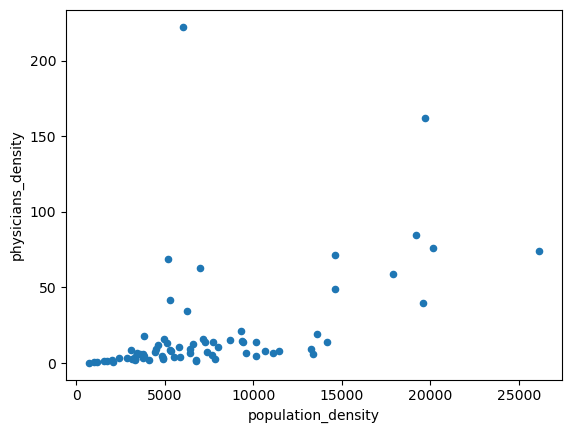

In [12]:
df.plot.scatter(x="population_density", y="physicians_density");

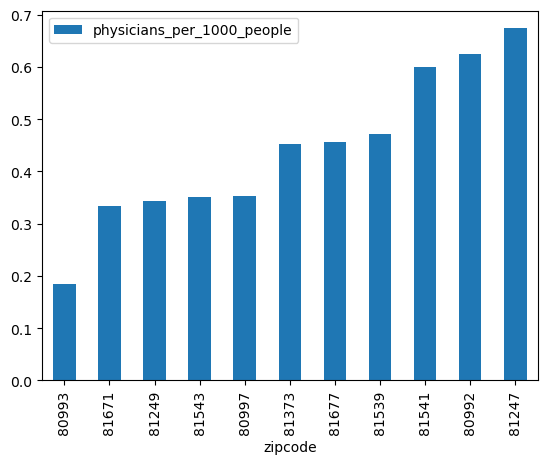

In [13]:
df.loc[:10].plot.bar(x="zipcode", y="physicians_per_1000_people");

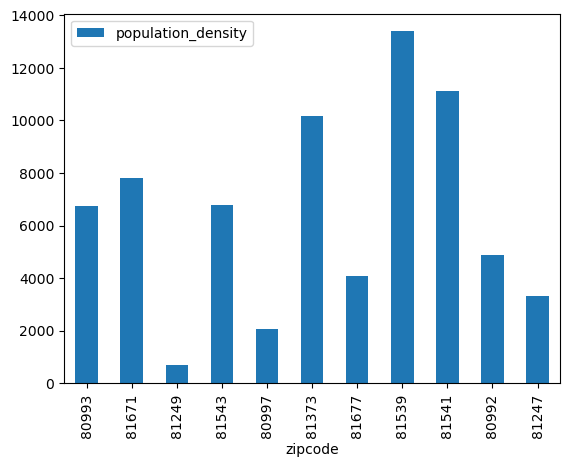

In [14]:
df.loc[:10].plot.bar(x="zipcode", y="population_density");

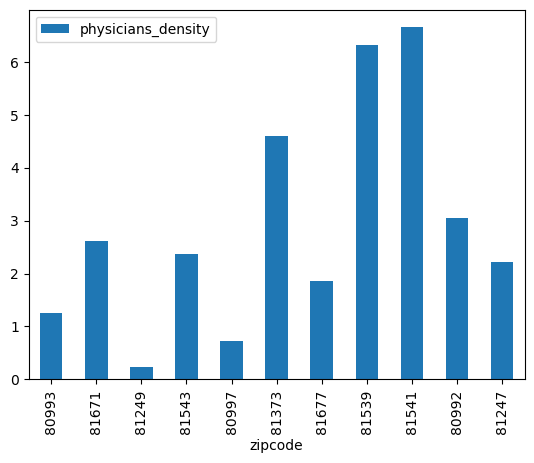

In [15]:
df.loc[:10].plot.bar(x="zipcode", y="physicians_density");

In [16]:
total_num_of_physicians = df.physicians_count.sum()
total_num_of_physicians

2380

In [17]:
df.describe(include="all")

,zipcode,population,sqkm,lat,lon,population_density,physicians_count,physicians_density,physicians_per_1000_people,reverse_physicians_per_1000_people
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,81137.405405,18220.027027,4.174548,48.142137,11.557905,7425.314625,32.162162,20.270605,2.474187,0.992121
std,477.125466,5817.397778,4.470463,0.033136,0.060241,5195.165543,27.557177,35.648604,4.597335,0.866337
min,80331.000000,3210.000000,0.469850,48.076100,11.388360,703.582746,3.000000,0.240967,0.185105,0.027247
25%,80797.250000,14546.000000,1.676475,48.119138,11.519333,3806.219981,15.000000,3.605087,0.783213,0.450802
50%,81120.000000,18418.000000,2.810330,48.142220,11.562035,5960.316044,24.000000,7.961995,1.358213,0.736264
75%,81544.500000,22983.500000,4.845814,48.162565,11.596937,9401.831427,42.000000,14.926613,2.219524,1.276833
max,81929.000000,28379.000000,24.899701,48.218000,11.691190,26152.091224,174.000000,222.287517,36.701118,5.402333


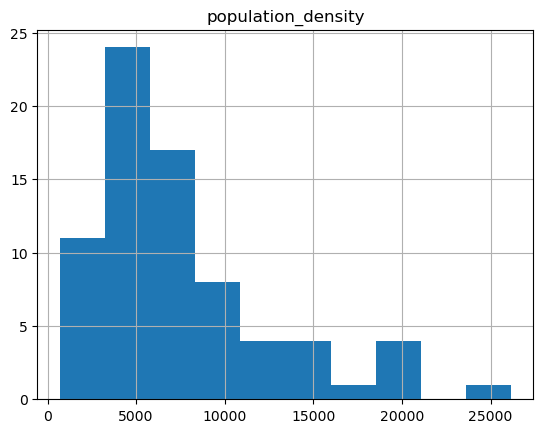

In [18]:
df.hist("population_density");

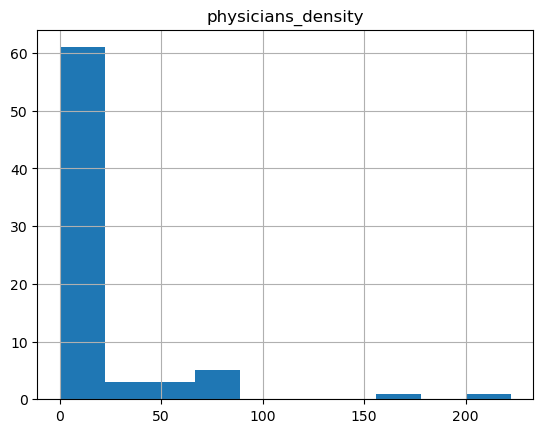

In [19]:
df.hist("physicians_density");

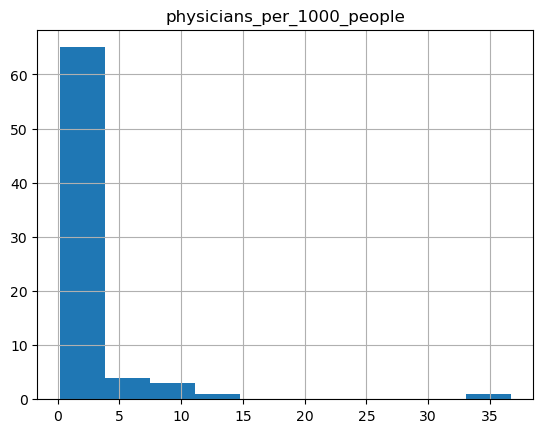

In [20]:
df.hist("physicians_per_1000_people");

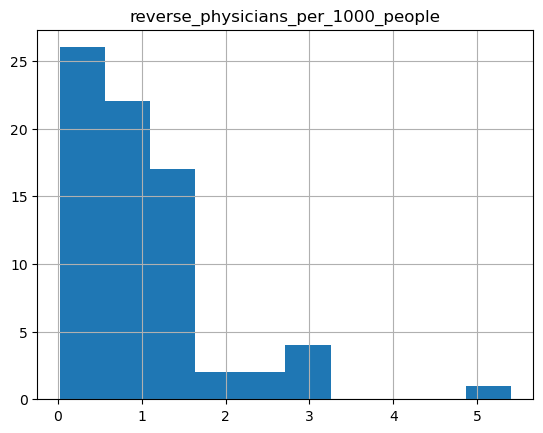

In [21]:
df.hist("reverse_physicians_per_1000_people");